## linear regression is for contineous variables

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

In [4]:
#read data
data=pd.read_csv("/home/yp/Spyder/Datasets/headbrain.csv")

In [5]:
print(data.shape)
print(data.head())

(237, 4)
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [8]:
#collect x and y values, i.e. values of independent and dependent variable
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [11]:
#mean of X & Y 
mean_x=np.mean(X)
mean_y=np.mean(Y)

#total number of values
n=len(X)
#calculate slop_m and c
numer=0
deno=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    deno+=(X[i]-mean_x)**2
slop_m=numer/deno
c=mean_y-(slop_m*mean_x)

#print slop_m and c
print(slop_m)
print(c)


0.26342933948939945
325.57342104944223


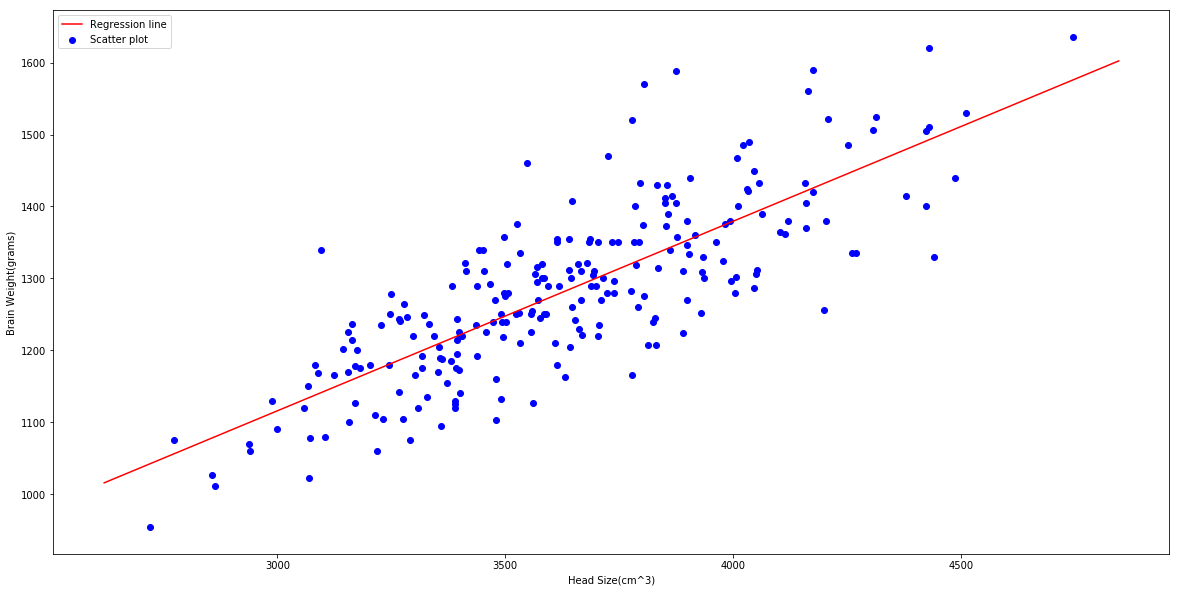

In [13]:
#ploting values and regression line
max_x=np.max(X)+100
min_x=np.min(X)-100

#Calculating line values x and y
x=np.linspace(min_x,max_x,1000)
y=c+slop_m*x

#ploting line
plt.plot(x,y,color='r',label='Regression line')
#plot scattered points
plt.scatter(X,Y,color='b',label='Scatter plot')

plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [14]:
#Check accuracy using mean squared method
sum_of_square=0
sum_of_resedual=0
for i in range(n):
    y_pred=c+slop_m*X[i]
    sum_of_square+=(Y[i]-mean_y)**2
    sum_of_resedual+=(Y[i]-y_pred)**2
Accuracy=1-(sum_of_resedual/sum_of_square)
print(Accuracy)

0.6393117199570003


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=X.reshape(n,1)
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)

Accuracy=reg.score(X,Y)

print(Accuracy)

0.639311719957
